<a href="https://colab.research.google.com/github/jiin124/2021_2_Network-anomaly-detection/blob/main/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSL-KDD



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d kiranmahesh/nslkdd

  0% 0.00/2.56M [00:00<?, ?B/s]
100% 2.56M/2.56M [00:00<00:00, 41.9MB/s]


In [ ]:
!unzip '*.zip'

Archive:  nslkdd.zip
  inflating: kdd_test.csv            
  inflating: kdd_train.csv           


In [ ]:
train=pd.read_csv("kdd_train.csv")
test=pd.read_csv("kdd_test.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,269,0.0,0.0,0.0,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,121,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [ ]:
test.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

##  EDA

In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

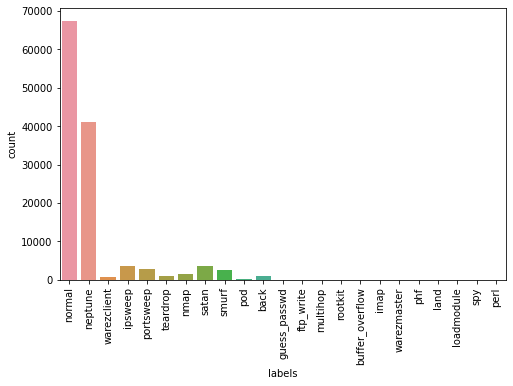

In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot(data=train,x='labels')

In [ ]:
train['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

labels를 어떻게 처리할지 고민.. 라벨링을 하는게 좋을까?

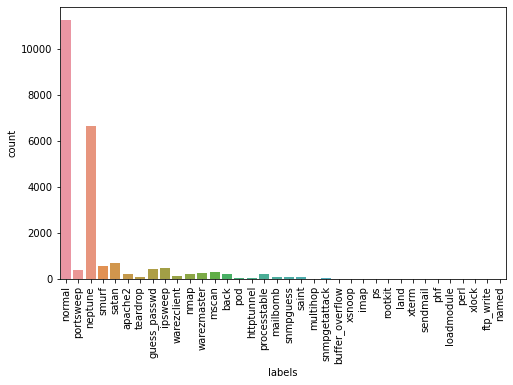

In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot(data=test,x='labels')

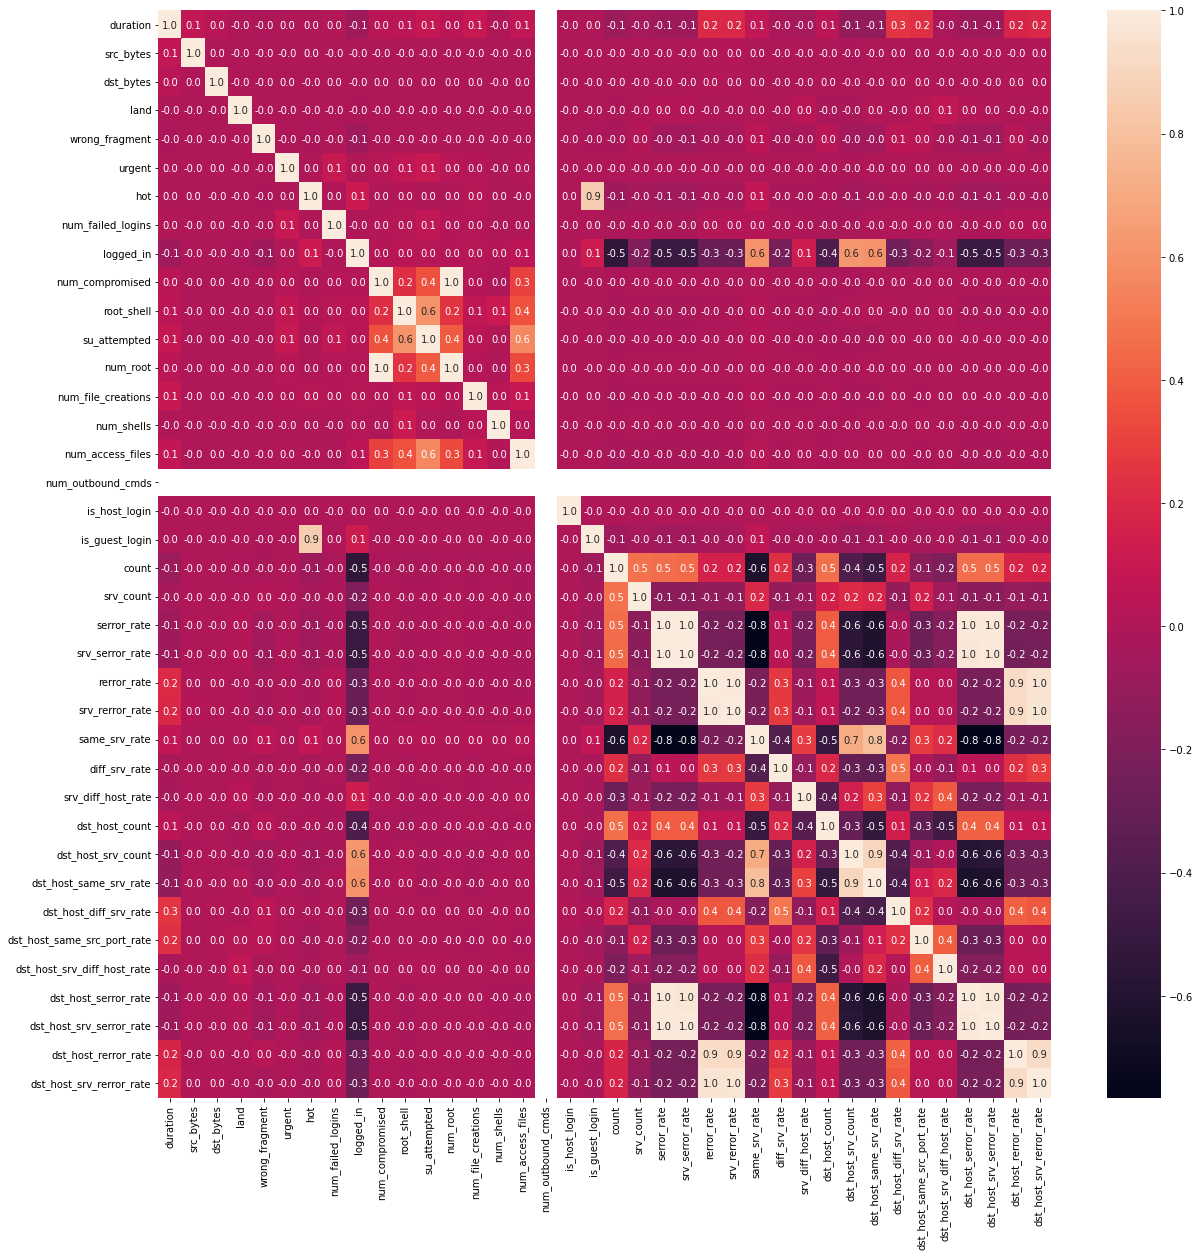

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True, fmt='1.1f')

num_outbound_cmds 데이터가 이상해서 봤는데 NaN으로 모두 이루어져있었다.

In [ ]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
train['duration'].value_counts()

0        115955
1          1989
2           843
3           557
4           351
          ...  
38714         1
10028         1
7979          1
5930          1
2015          1
Name: duration, Length: 2981, dtype: int64

In [ ]:
train['is_guest_login'].value_counts()

0    124786
1      1187
Name: is_guest_login, dtype: int64

In [ ]:
col=train.columns

for i in col:
  print(i,train[i].unique())
  print("\n")

duration [    0  5607   507 ...  5430 11680   679]


protocol_type ['tcp' 'udp' 'icmp']


service ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


flag ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


src_bytes [  491   146     0 ...  2816 11466  2358]


dst_bytes [    0  8153   420 ...  5424 17655 52866]


land [0 1]


wrong_fragment [0 3 1]


urgent [0 1 3 2]


hot [ 0  5  6  4  2  1 28 30 22 24 14  3 

범주형 데이터들은 원핫인코딩으로 변경하는 게 좋을 듯. 수치형 데이터는 스케일링 ㄱ


수치형 데이터 : duration,src_bytes,dst_bytes,모든 rate

범주형 데이터 : protocol_type,service,flag,land,urgent,num_failed_logins,logged_in,root_shell,
su_attempted,num_shells,is_host_login,is_guest_login,labels

잘모르겠는데이터 : wrong_fragment,hot,num_compromised,num_root,num_file_creations,
num_access_files,count,srv_count,dst_host_count,dst_host_srv_count

In [ ]:
train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
harvest          2
http_8001        2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64

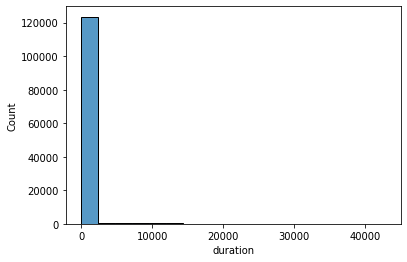

In [ ]:
sns.histplot(train,x='duration')

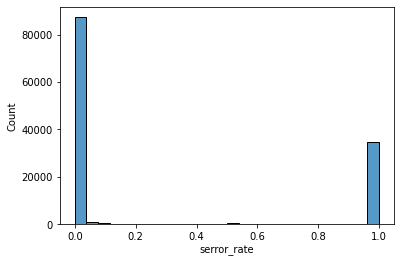

In [ ]:
sns.histplot(train,x='serror_rate')

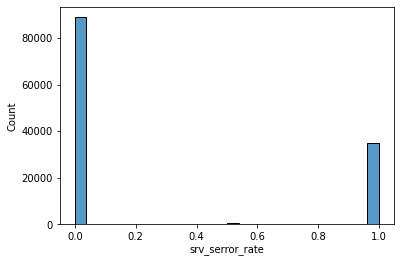

In [ ]:
sns.histplot(train,x='srv_serror_rate')

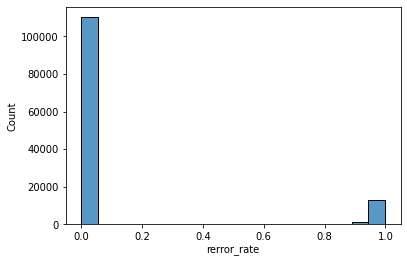

In [ ]:
sns.histplot(train,x='rerror_rate')

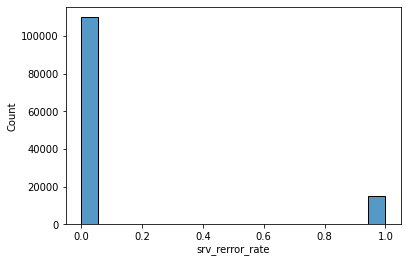

In [ ]:
sns.histplot(train,x='srv_rerror_rate')

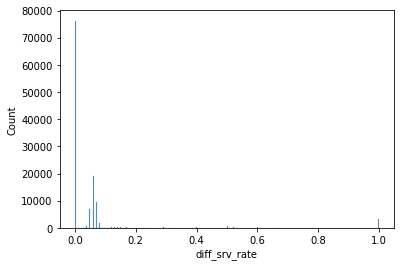

In [ ]:
sns.histplot(train,x='diff_srv_rate')

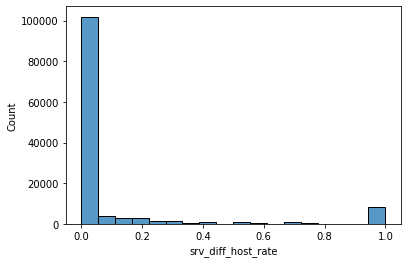

In [ ]:
sns.histplot(train,x='srv_diff_host_rate')

In [ ]:
train['wrong_fragment'].value_counts()

0    124883
3       884
1       206
Name: wrong_fragment, dtype: int64

근데 wrong_fragment는 수치형 데이터일까 범주형 데이터일까

In [ ]:
train['count'].value_counts().sort_index()

0         13
1      27763
2       9474
3       3962
4       3550
       ...  
507        6
508       31
509      243
510      307
511     1437
Name: count, Length: 512, dtype: int64

### labels 값으로 groupby, mean으로 적용

In [ ]:
train.groupby('labels').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back,0.297071,5.365593e+04,8.127597e+03,0.000000,0.000000,0.000000,1.916318,0.000000,1.000000,0.923640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.511506,3.815900,0.006077,0.006600,0.078536,0.134561,0.997688,0.004644,0.118441,145.770921,145.770921,1.000000,0.000000,0.023431,0.000000,0.002029,0.002029,0.063902,0.063902
buffer_overflow,91.700000,1.400433e+03,6.339833e+03,0.000000,0.000000,0.000000,2.066667,0.000000,1.000000,1.500000,0.600000,0.000000,0.166667,0.633333,0.000000,0.000000,0.0,0.000000,0.000000,9.100000,1.333333,0.066000,0.000000,0.017000,0.033333,0.917333,0.038000,0.000000,3.066667,13.900000,1.000000,0.000000,0.680667,0.075000,0.000000,0.000000,0.021333,0.021333
ftp_write,32.375000,2.207500e+02,5.382250e+03,0.000000,0.000000,0.375000,0.500000,0.000000,0.750000,0.125000,0.000000,0.000000,0.250000,0.250000,0.000000,0.375000,0.0,0.000000,0.250000,1.000000,1.125000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.125000,1.500000,22.750000,0.875000,0.250000,0.875000,0.117500,0.000000,0.000000,0.000000,0.000000
guess_passwd,2.716981,1.253396e+02,2.161887e+02,0.000000,0.000000,0.000000,1.056604,1.056604,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.018868,1.528302,1.528302,0.037736,0.037736,0.924528,0.924528,1.000000,0.000000,0.000000,26.018868,26.037736,1.000000,0.000000,0.105283,0.018868,0.101509,0.101509,0.879245,0.879245
imap,6.545455,3.791818e+02,5.994400e+04,0.000000,0.000000,0.000000,0.363636,0.000000,0.090909,1.454545,0.000000,0.000000,1.454545,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.090909,103.909091,0.667273,0.577273,0.000000,0.025455,1.000000,0.000000,0.234545,28.636364,5.545455,0.909091,0.000909,0.666364,0.000000,0.579091,0.579091,0.002727,0.000000
ipsweep,3.616004,9.605168e+00,1.514643e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.006946,0.001111,0.000000,0.000000,0.001111,0.005001,0.000000,0.000000,0.0,0.000000,0.000000,1.032509,19.157822,0.000275,0.000000,0.118505,0.118136,0.998475,0.001967,0.703620,6.201445,81.267574,0.875782,0.131428,0.875777,0.536757,0.000006,0.000022,0.122306,0.113790
land,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.388889,1.777778,0.962778,1.000000,0.037222,0.000000,0.907778,0.060000,0.777778,3.222222,4.333333,0.848333,0.031111,0.848333,0.562222,0.876111,0.633889,0.007222,0.000000
loadmodule,36.222222,1.518889e+02,3.009889e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.888889,0.555556,0.333333,0.000000,0.333333,1.444444,0.444444,0.111111,0.0,0.000000,0.000000,1.666667,1.333333,0.000000,0.000000,0.000000,0.000000,0.880000,0.241111,0.000000,2.666667,3.555556,0.835556,0.205556,0.735556,0.207778,0.000000,0.000000,0.000000,0.011111
multihop,184.000000,4.351429e+02,2.130163e+05,0.000000,0.000000,0.000000,3.000000,0.000000,0.571429,8.571429,0.285714,0.000000,13.285714,1.428571,0.428571,0.285714,0.0,0.000000,0.285714,1.000000,1.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857,74.000000,1.571429,0.715714,0.002857,0.714286,0.000000,0.000000,0.000000,0.011429,0.000000


In [ ]:
groupby_duration=train.groupby('labels').mean()['duration']

In [ ]:
groupby_duration

labels
back                  0.297071
buffer_overflow      91.700000
ftp_write            32.375000
guess_passwd          2.716981
imap                  6.545455
ipsweep               3.616004
land                  0.000000
loadmodule           36.222222
multihop            184.000000
neptune               0.000049
nmap                  0.000000
normal              168.587396
perl                 41.333333
phf                   4.500000
pod                   0.000000
portsweep          8246.697032
rootkit             100.800000
satan                 0.127718
smurf                 0.000000
spy                 318.000000
teardrop              0.000000
warezclient         705.092135
warezmaster          15.050000
Name: duration, dtype: float64

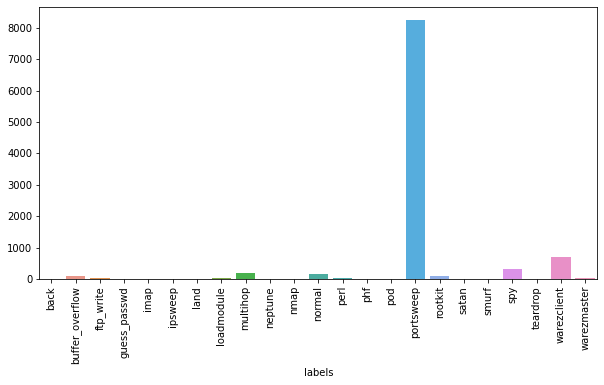

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=groupby_duration.index,y=groupby_duration.values)

귀찮으니 한번에 출력해보겠다

In [ ]:
group_col=train.groupby('labels').mean().columns

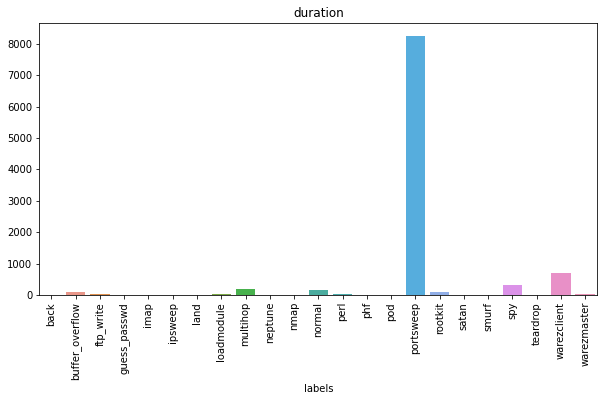

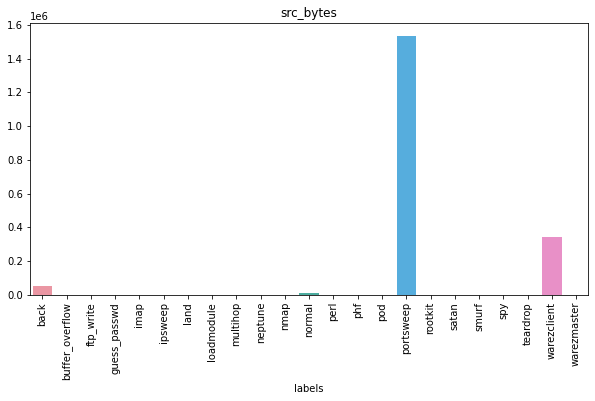

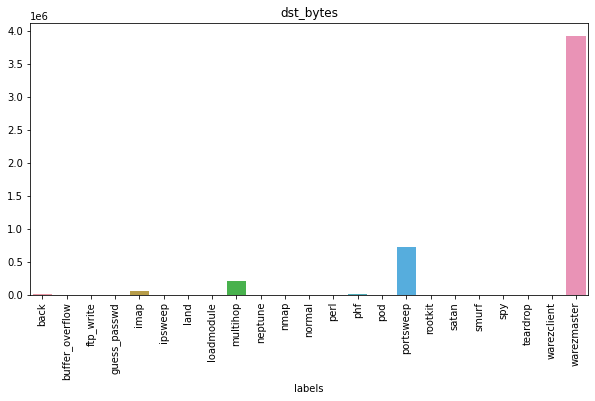

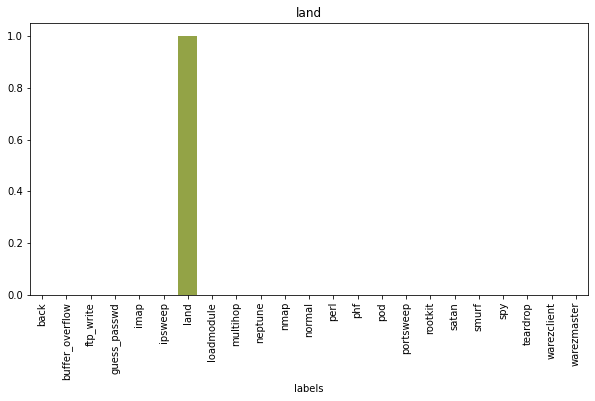

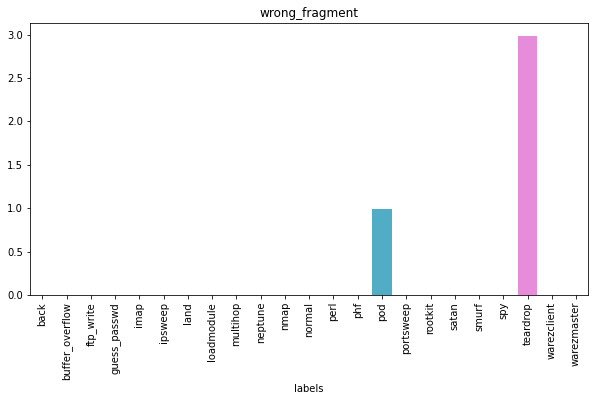

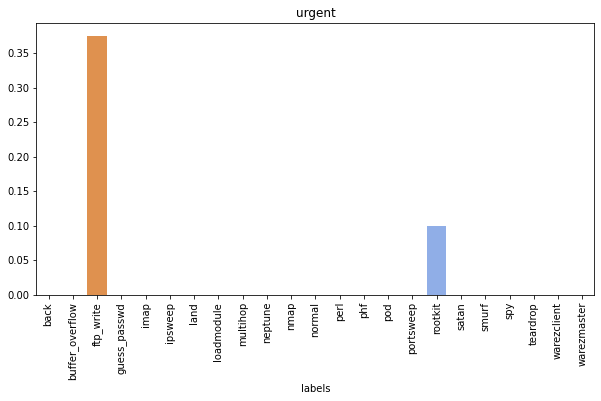

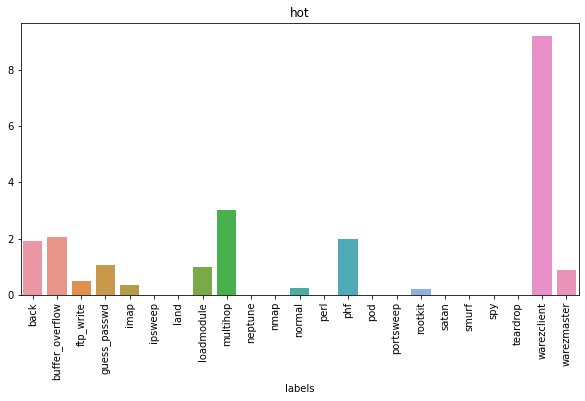

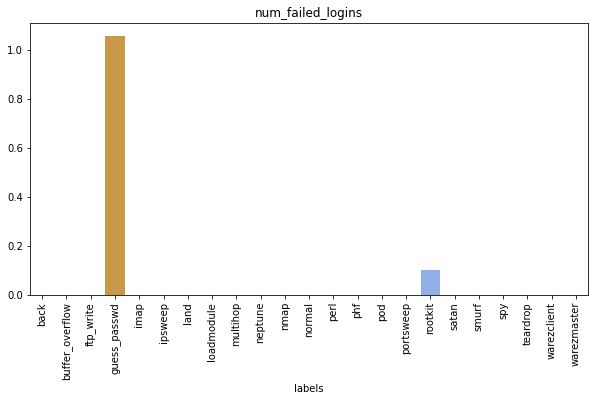

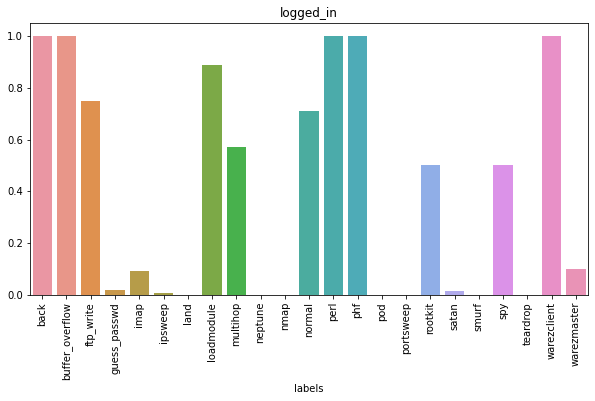

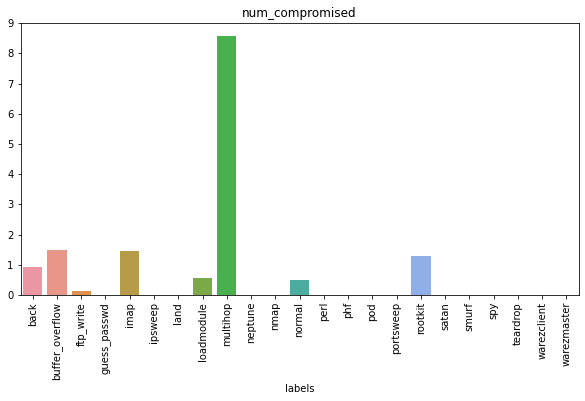

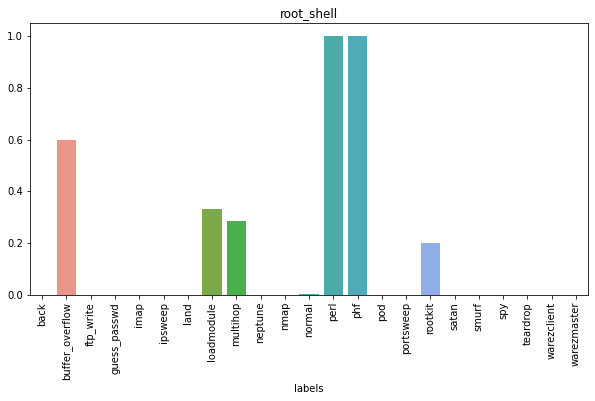

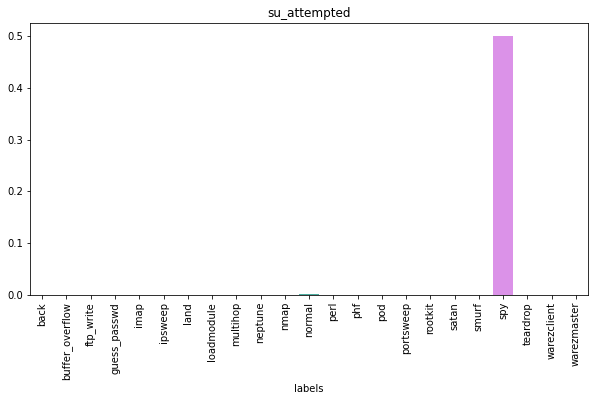

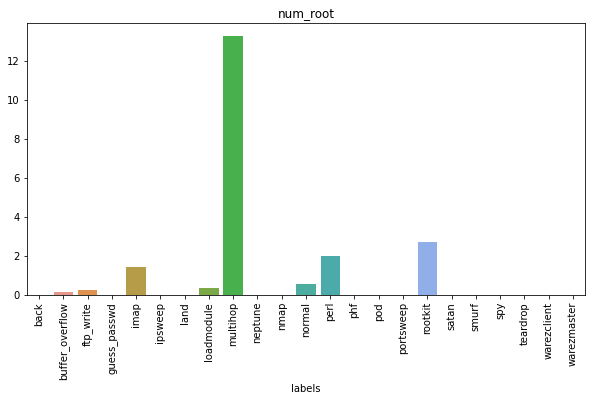

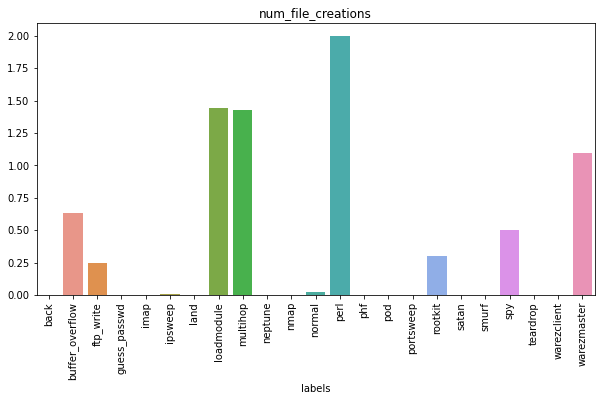

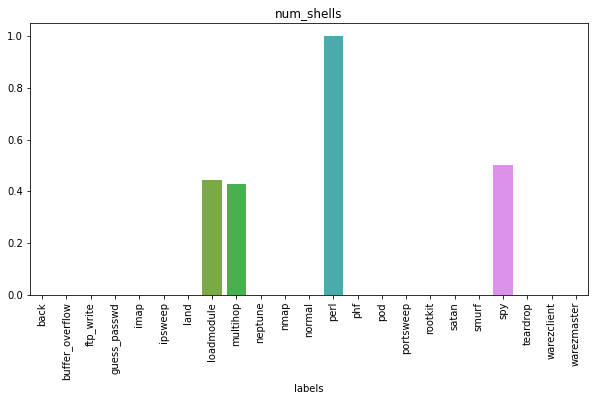

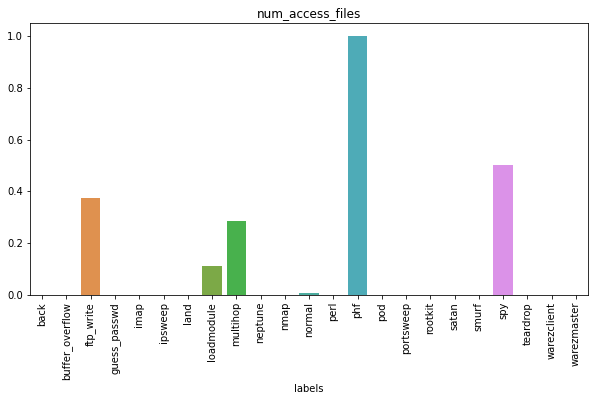

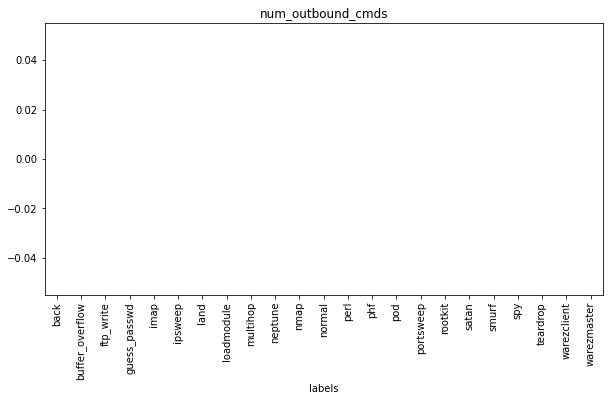

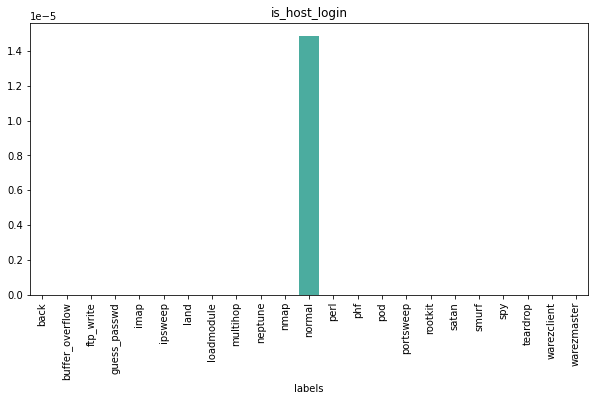

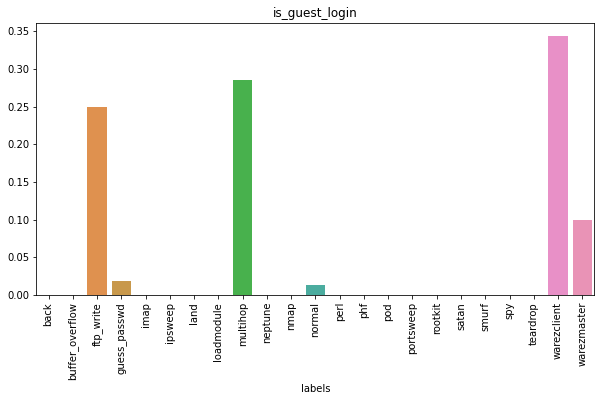

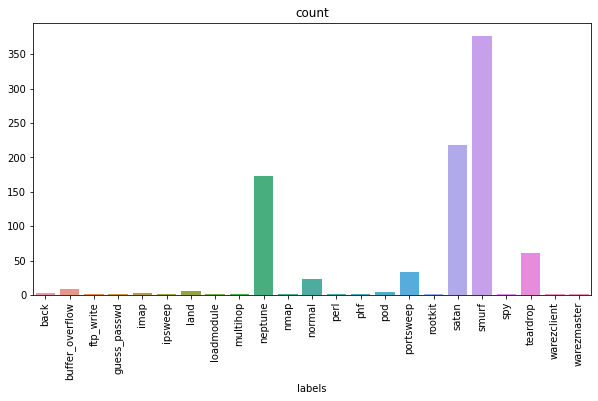

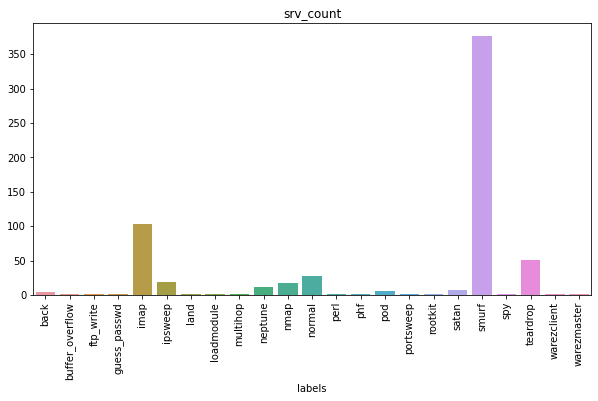

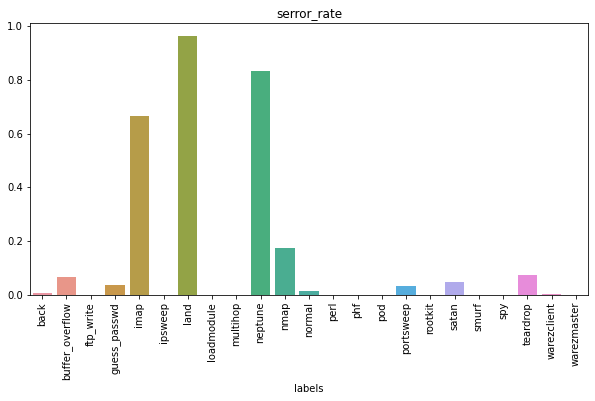

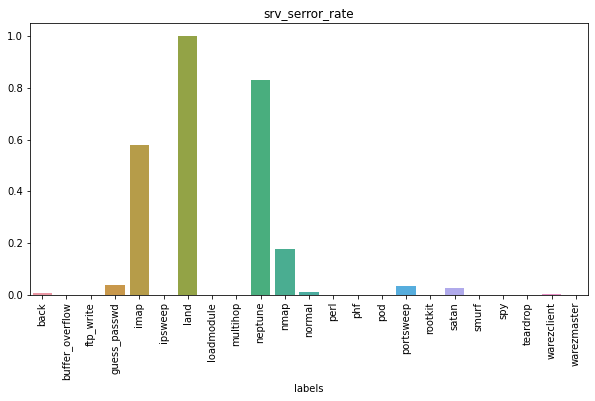

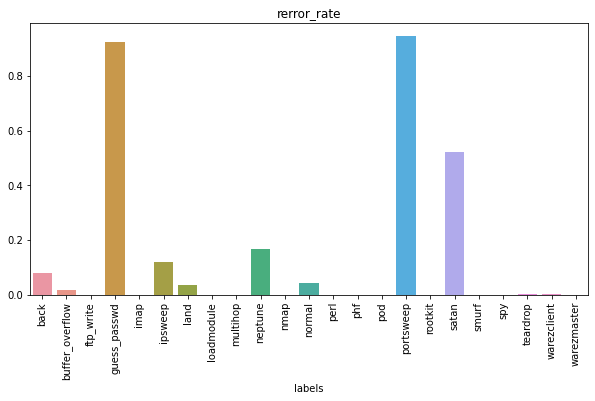

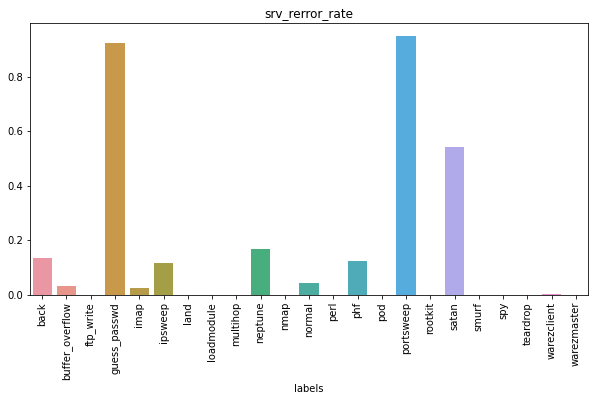

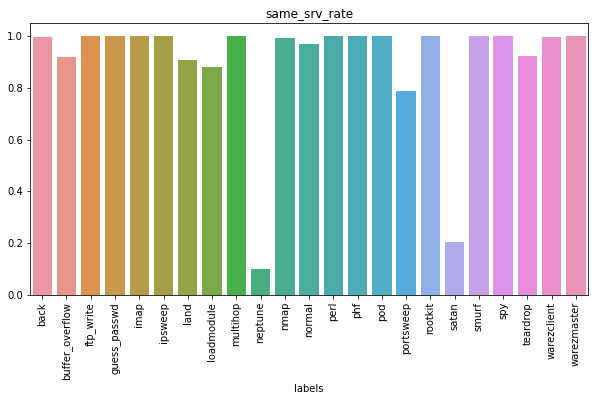

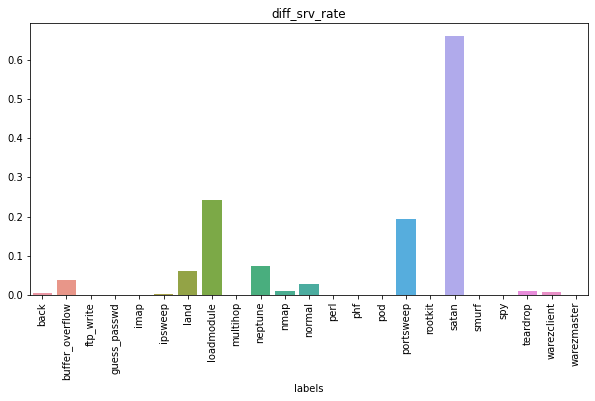

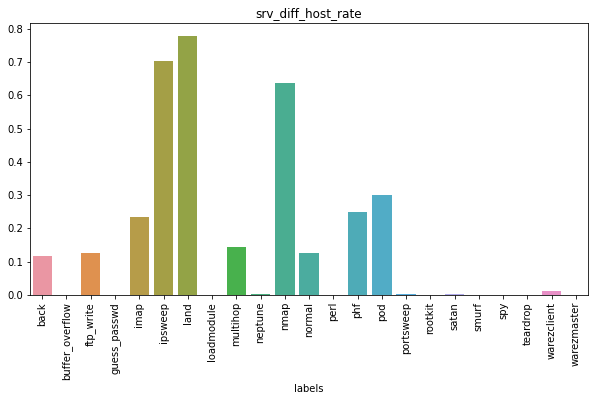

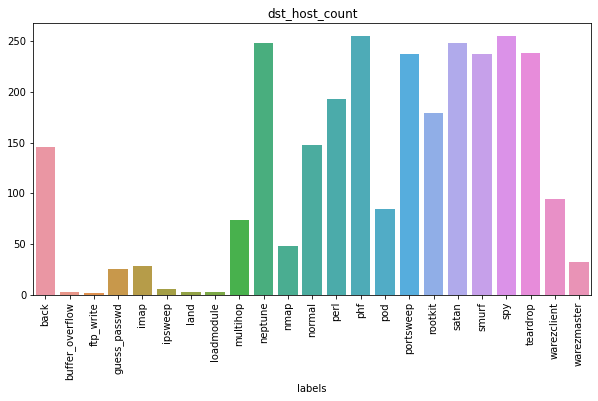

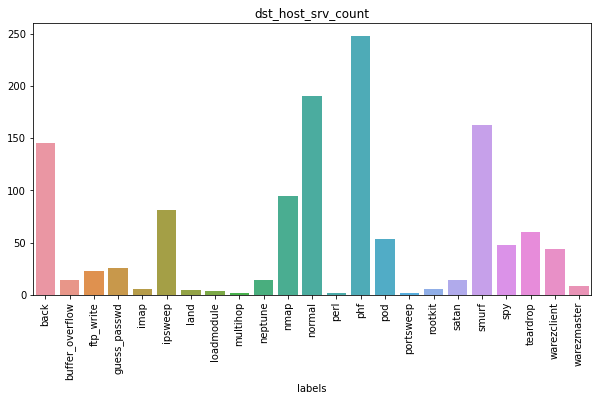

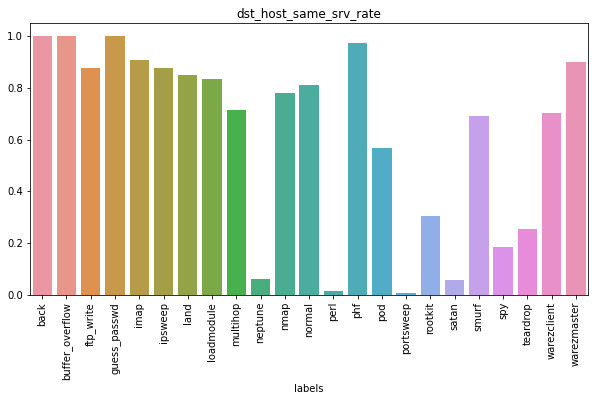

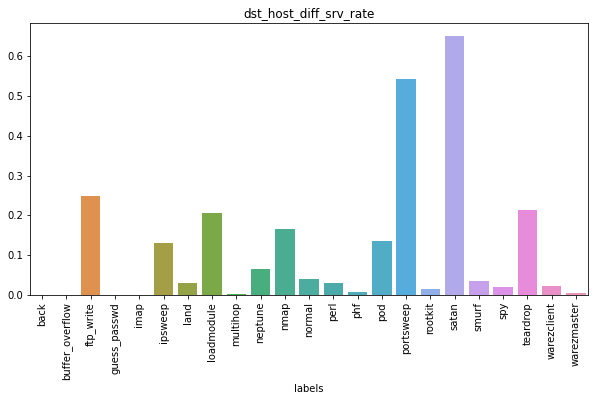

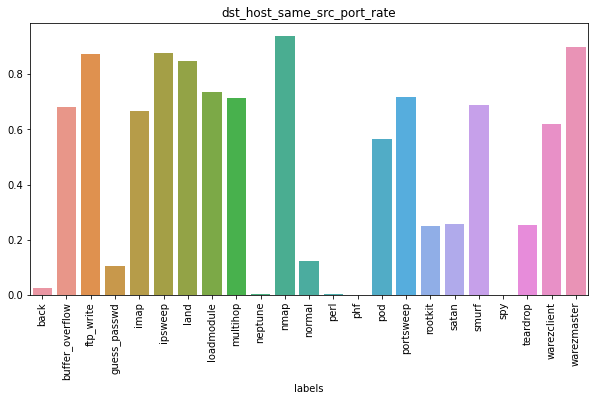

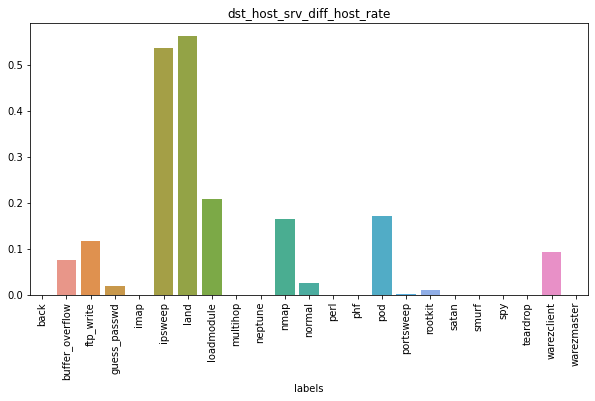

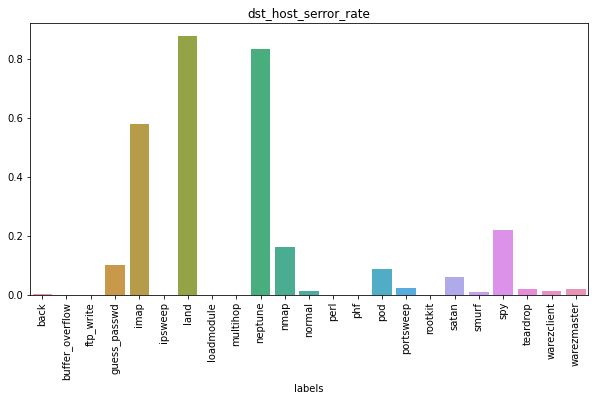

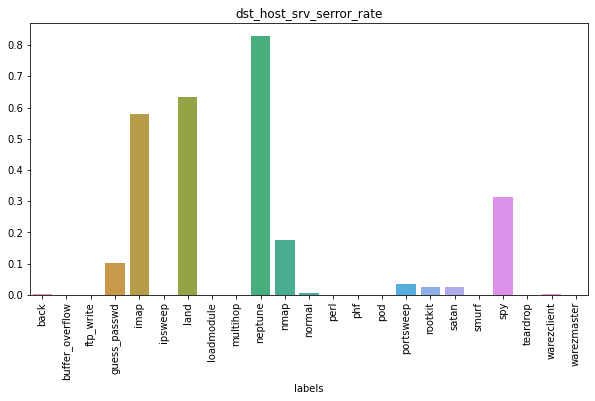

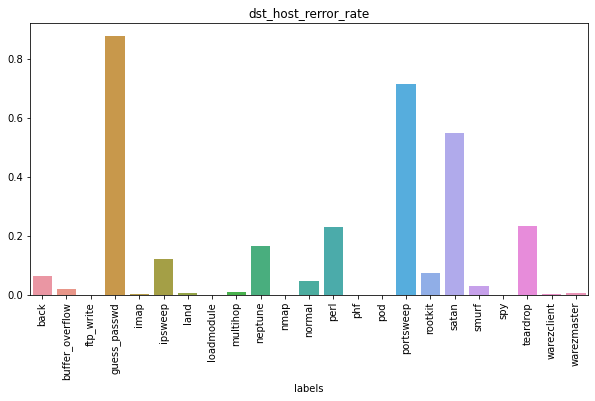

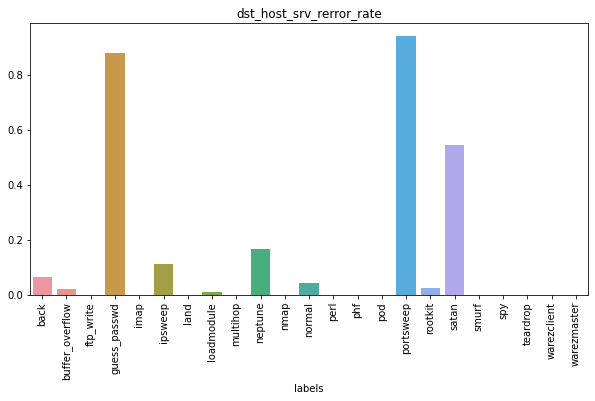

In [ ]:
for i in group_col:
  plt.figure(figsize=(10,5))
  plt.title(i)
  plt.xticks(rotation=90)
  sns.barplot(x=train.groupby('labels').mean()[i].index,y=train.groupby('labels').mean()[i].values)


## 전처리

범주형 데이터 라벨링, target인 labels 라벨링, 그리고 스케일링은 잠시 보류

In [ ]:
#NULL값으로 채워져있었던 컬럼인 num_out_bound_cmds는 삭제
train.drop('num_outbound_cmds',axis=1,inplace=True)
test.drop('num_outbound_cmds',axis=1,inplace=True)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
len(train.columns)

41

In [ ]:
len(test.columns)

41

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in range(len(train)):
  if train['labels'][i]=='normal':
    train['labels'][i]=0
  else:
    train['labels'][i]=1

In [ ]:
train['labels'].value_counts()

0    67343
1    58630
Name: labels, dtype: int64

In [ ]:
train=train.astype({'labels':'int'})

이제 object 형식의 데이터는 없다.이제 test도 바꾸어주겠다.

In [ ]:
for i in range(len(test)):
  if test['labels'][i]=='normal':
    test['labels'][i]=0
  else:
    test['labels'][i]=1

In [ ]:
test=test.astype({'labels':'int'})

### get_dummies적용

In [ ]:
#pro_1=pd.get_dummies(train['protocol_type'])
#train=pd.concat((train,pro_1),axis=1)
#service_1=pd.get_dummies(train['service'])
#train=pd.concat((train,service_1),axis=1)
#flag_1=pd.get_dummies(train['flag'])
#train=pd.concat((train,flag_1),axis=1)


In [ ]:
#train.drop(['protocol_type','service','flag'],inplace=True,axis=1)

In [ ]:
#pro_1=pd.get_dummies(test['protocol_type'])
#test=pd.concat((test,pro_1),axis=1)
#service_1=pd.get_dummies(test['service'])
#test=pd.concat((test,service_1),axis=1)
#flag_1=pd.get_dummies(test['flag'])
#test=pd.concat((test,flag_1),axis=1)

In [ ]:
#test.drop(['protocol_type','service','flag'],inplace=True,axis=1)

이제 다시 분석을 해보겠다. 

labels와 상관성이 있어보이는 컬럼. count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_sampe_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,flag_enc

## 2차 EDA

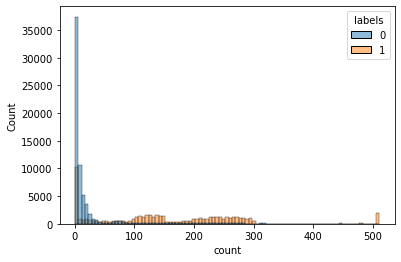

In [ ]:
sns.histplot(train,x='count',hue='labels')

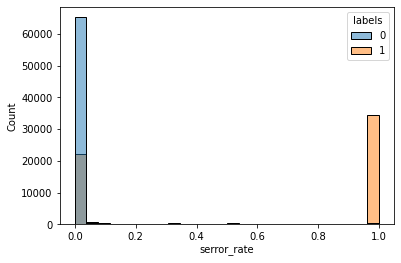

In [ ]:
sns.histplot(train,x='serror_rate',hue='labels')

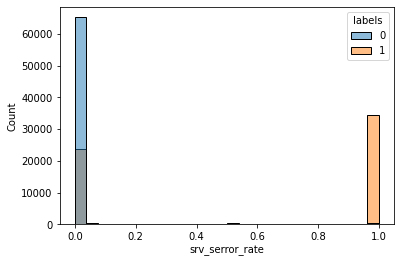

In [ ]:
sns.histplot(train,x='srv_serror_rate',hue='labels')

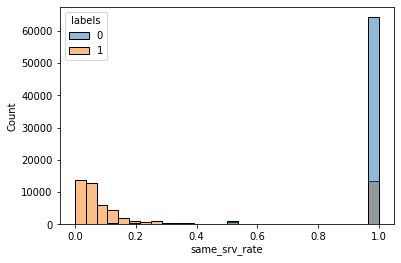

In [ ]:
sns.histplot(train,x='same_srv_rate',hue='labels')


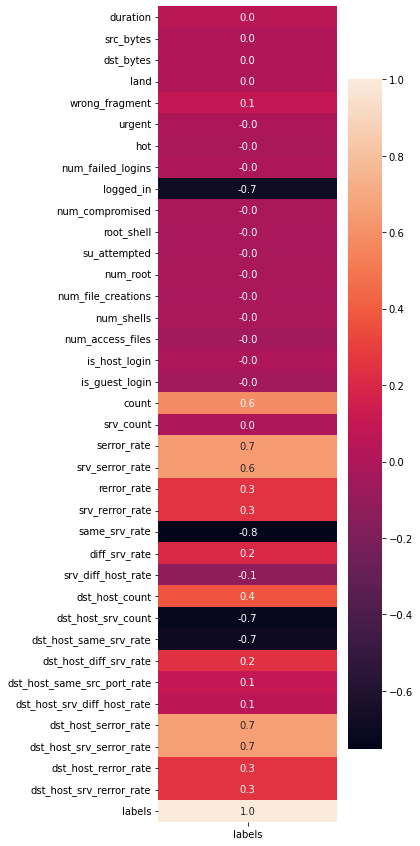

In [ ]:
plt.figure(figsize=(4,15))
sns.heatmap(train.corr()[['labels']],annot=True, fmt='1.1f')

## test,train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

In [ ]:
x_train = train.drop(columns = 'labels')
y_train = train['labels']
x_test = test.drop(columns = 'labels')
y_test = test['labels']

In [ ]:
col = ['protocol_type', 'service', 'flag']

for i in col:
  ohe = pd.get_dummies(x_train[i], prefix=i)
  x_train = pd.concat((x_train, ohe), axis = 1).drop(i, axis = 1)
  ohe = pd.get_dummies(x_test[i], prefix=i)
  x_test = pd.concat((x_test, ohe), axis = 1).drop(i, axis = 1)

In [ ]:
len(x_train.columns)

121

In [ ]:
len(x_test.columns)

121

In [ ]:
for i in x_train.columns:
  count = 0
  for j in x_test.columns:
    if i == j:
      count += 1
  if count == 0:
    x_test[i] = 0

## 모델링

결정트리를 이용한 모델인 랜덤포레스트와 오토인코더와 비슷한 pca를 사용

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.9206440738112136


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     11245
           1       0.99      0.85      0.91     11299

    accuracy                           0.92     22544
   macro avg       0.93      0.92      0.92     22544
weighted avg       0.93      0.92      0.92     22544



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f},재현율:{2:.4f}'.format(accuracy,precision,recall))


  

In [ ]:
get_clf_eval(y_test,pred)

오차행렬
[[11159    86]
 [ 1703  9596]]
정확도:0.9206, 정밀도:0.9911,재현율:0.8493


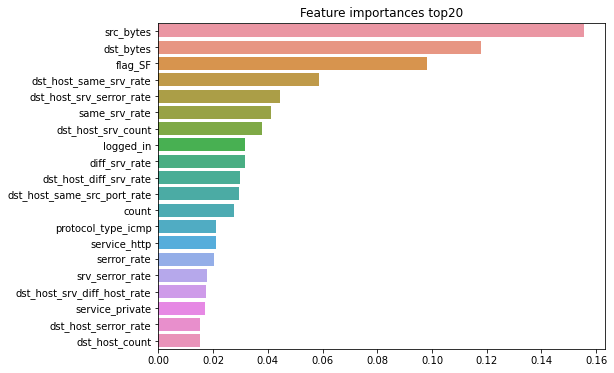

In [ ]:
ftr_importance_values=rf_clf.feature_importances_
ftr_importance=pd.Series(ftr_importance_values,index=x_train.columns)
ftr_top20=ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

### 하이퍼파라미터 튜닝
실패함

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[50,100,150,200],
    'max_depth':[4,6],
    'min_samples_leaf':[8,12,16],
    'min_samples_split':[8,16,20]
}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

NameError: ignored

In [ ]:
rf_clf1=RandomForestClassifier(max_depth=6,min_samples_leaf=8,min_samples_split=8,n_estimators=1000,
                               random_state=0)
rf_clf1.fit(x_train,y_train)
pred=rf_clf1.predict(x_test)
print('예측 정확도 :{0:.4f}'.format(accuracy_score(y_test,pred)))

NameError: ignored

In [ ]:
get_clf_eval(y_test,pred)

## PCA


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_scaled=StandardScaler().fit_transform(x_train)
x_test_scaled=StandardScaler().fit_transform(x_test)

NameError: ignored

In [ ]:
x_train

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled)
x_test_scaled=pd.DataFrame(x_test_scaled)

In [ ]:
x_train_scaled

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(x_train_scaled)
print('pca components별 변동성:',pca.explained_variance_ratio_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(random_state=0)
scores=cross_val_score(rcf,x_train_scaled,y_train,scoring='accuracy',cv=3)
print('cv=3인 경우 개별 fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=6)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.fit_transform(x_test_scaled)

scores_pca=cross_val_score(rcf,x_train_pca,y_train,scoring='accuracy',cv=3)
print(scores_pca)
print(np.mean(scores_pca))



In [ ]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(x_train_pca,y_train)
pred=rf_clf.predict(x_test_pca)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

In [ ]:
pd.DataFrame(x_train_pca)

## lgbm

In [ ]:
from lightgbm import LGBMClassifier


lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(x_test,y_test)]
lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(x_test)
pred_proba=lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.617558	valid_0's binary_logloss: 0.617558
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.554371	valid_0's binary_logloss: 0.554371
[3]	valid_0's binary_logloss: 0.503357	valid_0's binary_logloss: 0.503357
[4]	valid_0's binary_logloss: 0.461337	valid_0's binary_logloss: 0.461337
[5]	valid_0's binary_logloss: 0.424063	valid_0's binary_logloss: 0.424063
[6]	valid_0's binary_logloss: 0.392089	valid_0's binary_logloss: 0.392089
[7]	valid_0's binary_logloss: 0.365712	valid_0's binary_logloss: 0.365712
[8]	valid_0's binary_logloss: 0.34387	valid_0's binary_logloss: 0.34387
[9]	valid_0's binary_logloss: 0.324416	valid_0's binary_logloss: 0.324416
[10]	valid_0's binary_logloss: 0.308653	valid_0's binary_logloss: 0.308653
[11]	valid_0's binary_logloss: 0.294572	valid_0's binary_logloss: 0.294572
[12]	valid_0's binary_logloss: 0.2829	valid_0's binary_logloss: 0.2829
[13]	valid_0's binary_logloss: 0.273745	valid_0's bi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score

In [ ]:
def get_clf_eval(y_test,pred,pred_proba):
  confusion=confusion_matrix(y_test,pred)#오차행렬
  accuracy=accuracy_score(y_test,pred)#정확도
  precision=precision_score(y_test,pred)#정밀도
  recall=recall_score(y_test,pred)#재현율
  f1=f1_score(y_test,pred)
  roc_auc=roc_auc_score(y_test,pred)

  print(confusion)
  print("정확도 :{0:.4f}, 정밀도 : {0:.4f}, 재현율 : {0:.4f}, f1 : {0:.4f},AUC:{4:.4f}".format(accuracy,precision,recall,f1,roc_auc))


In [ ]:
get_clf_eval(y_test,preds,pred_proba)

[[11052   193]
 [ 1498  9801]]
정확도 :0.9250, 정밀도 : 0.9250, 재현율 : 0.9250, f1 : 0.9250,AUC:0.9251


In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[200,400,500],
    'learning_rate':[0.01,0.05,0.1,0.5],
    'max_depth':[4,6],
    'colsample_bytree':[0.1,0.5,0.8],
    'subsample':[0.1,0.5,0.7]
}

lgbm_clf=LGBMClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(lgbm_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))



최적 하이퍼 파라미터:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.1}
최고 예측 정확도: 0.9991


In [ ]:
lgbm_wrapper=LGBMClassifier(n_estimators=500,colsample_bytree=0.8,learning_rate=0.1,
                            max_depth=6,subsample=0.1)

evals=[(x_test,y_test)]
lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(x_test)
pred_proba=lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.618692	valid_0's binary_logloss: 0.618692
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.555227	valid_0's binary_logloss: 0.555227
[3]	valid_0's binary_logloss: 0.500488	valid_0's binary_logloss: 0.500488
[4]	valid_0's binary_logloss: 0.458088	valid_0's binary_logloss: 0.458088
[5]	valid_0's binary_logloss: 0.422305	valid_0's binary_logloss: 0.422305
[6]	valid_0's binary_logloss: 0.391199	valid_0's binary_logloss: 0.391199
[7]	valid_0's binary_logloss: 0.36352	valid_0's binary_logloss: 0.36352
[8]	valid_0's binary_logloss: 0.342369	valid_0's binary_logloss: 0.342369
[9]	valid_0's binary_logloss: 0.324333	valid_0's binary_logloss: 0.324333
[10]	valid_0's binary_logloss: 0.307048	valid_0's binary_logloss: 0.307048
[11]	valid_0's binary_logloss: 0.293939	valid_0's binary_logloss: 0.293939
[12]	valid_0's binary_logloss: 0.281627	valid_0's binary_logloss: 0.281627
[13]	valid_0's binary_logloss: 0.272252	valid_0'

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

[[11085   160]
 [ 1494  9805]]
정확도 :0.9266, 정밀도 : 0.9266, 재현율 : 0.9266, f1 : 0.9266,AUC:0.9268


In [ ]:
lgbm_wrapper=LGBMClassifier(n_estimators=500,colsample_bytree=0.8,learning_rate=0.1,
                            max_depth=6,subsample=0.1,random_state=0)

evals=[(x_test,y_test)]
lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_metric='logloss',
                 eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(x_test)
pred_proba=lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.615147	valid_0's binary_logloss: 0.615147
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.552246	valid_0's binary_logloss: 0.552246
[3]	valid_0's binary_logloss: 0.501039	valid_0's binary_logloss: 0.501039
[4]	valid_0's binary_logloss: 0.456496	valid_0's binary_logloss: 0.456496
[5]	valid_0's binary_logloss: 0.419895	valid_0's binary_logloss: 0.419895
[6]	valid_0's binary_logloss: 0.389591	valid_0's binary_logloss: 0.389591
[7]	valid_0's binary_logloss: 0.36314	valid_0's binary_logloss: 0.36314
[8]	valid_0's binary_logloss: 0.338802	valid_0's binary_logloss: 0.338802
[9]	valid_0's binary_logloss: 0.318396	valid_0's binary_logloss: 0.318396
[10]	valid_0's binary_logloss: 0.301427	valid_0's binary_logloss: 0.301427
[11]	valid_0's binary_logloss: 0.28809	valid_0's binary_logloss: 0.28809
[12]	valid_0's binary_logloss: 0.276833	valid_0's binary_logloss: 0.276833
[13]	valid_0's binary_logloss: 0.267284	valid_0's 

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

[[11117   128]
 [ 1546  9753]]
정확도 :0.9257, 정밀도 : 0.9257, 재현율 : 0.9257, f1 : 0.9257,AUC:0.9259


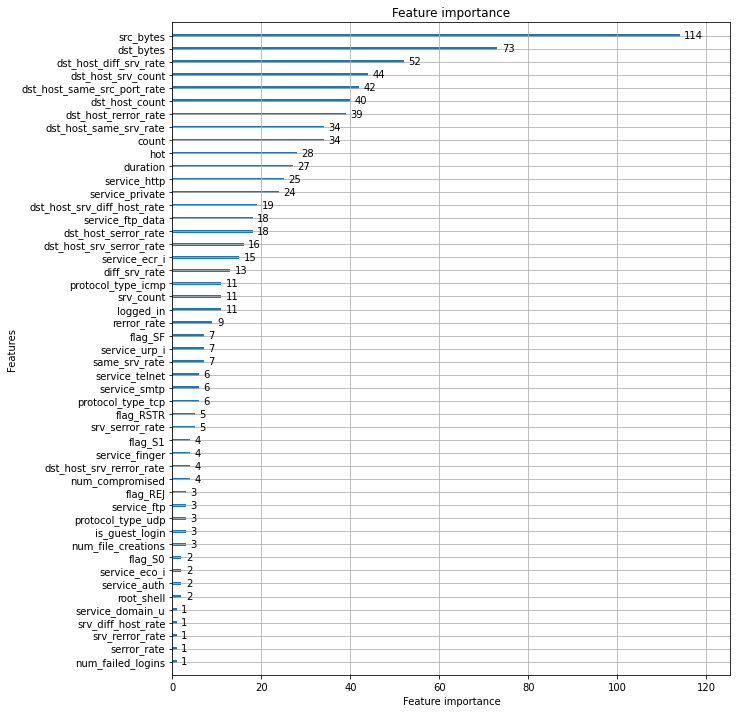

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def roc_curve_plot(y_test,pred_proba_c1):
  #임곗값에 따른 fpr,tpr 값을 반환 받음
  fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)

  #roc 곡선을 그래프 곡선으로 그림
  plt.plot(fprs,tprs,label='ROC')

  #가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1],'k--',label='Random')

  #FPR X축의 Scale을 0.1 단위로 변경, X,Y 축 명 설정 등
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()



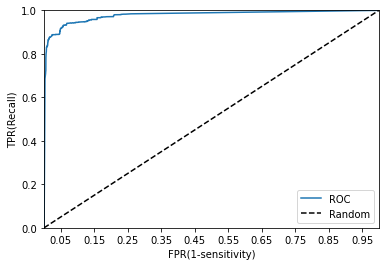

In [ ]:
roc_curve_plot(y_test,pred_proba)